In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        try:
          image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
          image = np.reshape(image, (48, 48))
          image_array[i] = image
        except:
          print(f"Image {i} have size {len(image)} not suitable")

    return image_array, image_label

In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')

        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
# df = pd.read_csv("/content/drive/MyDrive/Vinh_Project/icml_face_data.csv")
df = pd.read_csv('/content/drive/MyDrive/Vinh_Project/icml_face_data.csv')
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
df.shape

(35887, 2)

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [7]:
## parsing data here
images, labels = parse_data(df)
len(images), len(labels)

(35887, 35887)

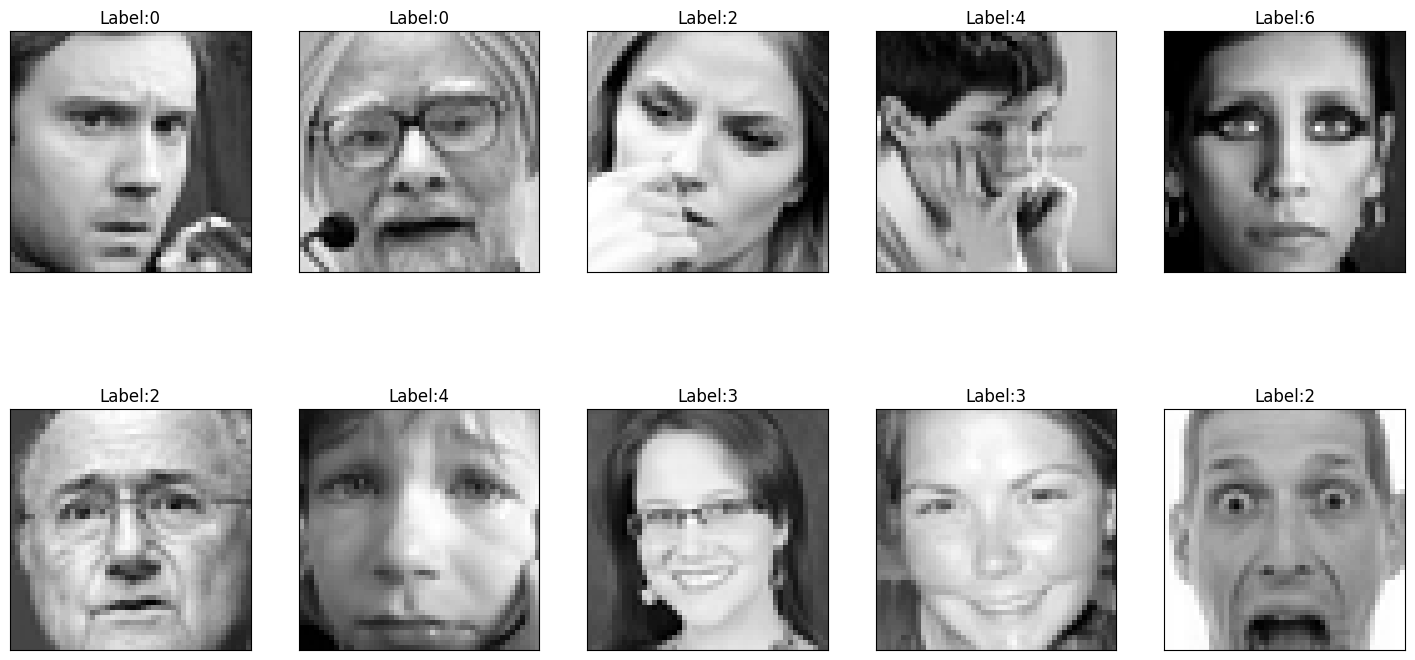

In [8]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
# pca.fit(images) ## modify images' array to the appropriate shape
reshaped_images = images.reshape((images.shape[0], -1))
pca.fit(reshaped_images)

PCA(n_components=2)

In [10]:
## transform for visualizing here
# images_pca = pca.transform(images) ## modify images' array to the appropriate shape
# images_pca.shape

images_pca = pca.transform(reshaped_images)
images_pca

array([[  691.75085917,  -442.32863293],
       [  -62.02548935,   561.7622019 ],
       [-1322.53807047,  -415.72970677],
       ...,
       [-1289.15565244, -1408.56830255],
       [ 2008.41357066,  -125.61091175],
       [ -210.23902665,  -486.56906583]])

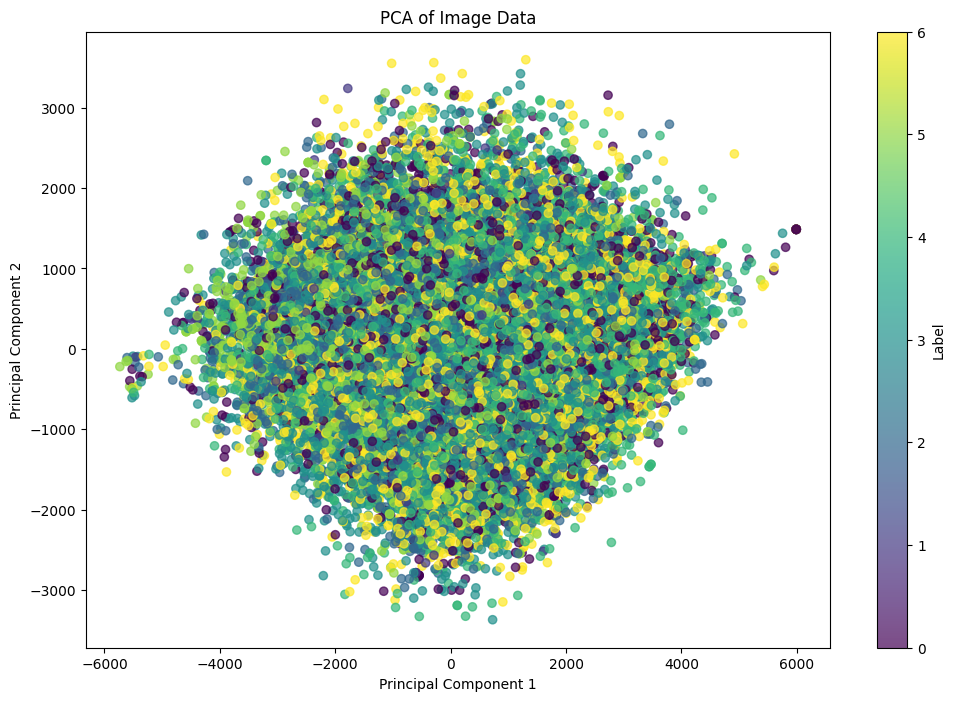

In [11]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.show()

Comment: Observing the PCA plot with 2 principal components, it can be seen that the data points belonging to different classes are not yet separated into distinct clusters. Therefore, it can be concluded that PCA with 2 principal components is unable to classsify between the 7 facial expressions of 5254 people.

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

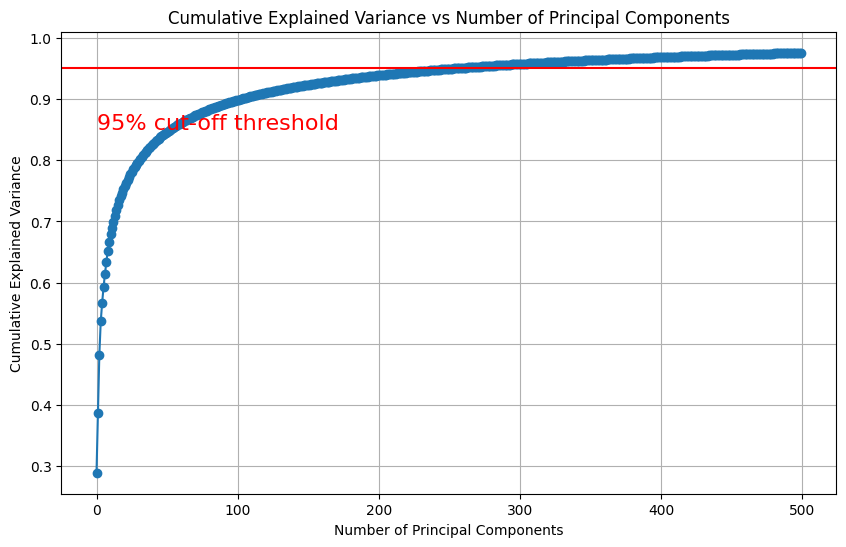

In [12]:
## determine the optimal number of PCs here
## pca.explained_variance_()

pca = PCA()
pca.fit(reshaped_images)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance[:500], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.grid(True)
plt.show()

In [13]:
variance_threshold = 0.95
optimal_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Optimal number of components to explain {variance_threshold*100}% variance: {optimal_components}")

Optimal number of components to explain 95.0% variance: 255


When i chose the variance_threshold = 0.95:
-  It mean that we are essentially aiming to keep 95% of the important information present in the original data while reducing its dimensionality.
- In PCA, data is transformed into a new set of variables called principal components, which are linear combinations of the original variables. These components capture the maximum amount of variance present in the data. By retaining 95% of the variance, we are ensuring that we are holding onto the most critical aspects of the data that explain its variability while still simplifying it by reducing the number of dimensions.
- So, by setting the goal of retaining 95% of the variance in PCA, we are trying to strike a balance between reducing the complexity of the data while still preserving the most essential information that it contains.

Finally, we found that n_components = 255 is the optimum components

In [14]:
pca=PCA(n_components=255)
images_pca = pca.fit_transform(reshaped_images)

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [15]:
## splitting data into train/val/test subsets here

def train_test_split(test_prop, input_im, input_label):
    # Random sampling of index
    test_size = int(np.floor(test_prop * len(input_label)))
    test_index = np.random.choice(len(input_label), size = test_size, replace = False)
    # Split
    train_x, test_x, train_y, test_y = np.delete(input_im, test_index, axis = 0), np.take(input_im, test_index, axis = 0), np.delete(input_label, test_index, axis = 0), np.take(input_label, test_index, axis = 0)
    # Return train and test sets for both images and labels
    # Because the limation of time, we will chose only 10,000 samples for train (7000) and test(3000).
    # return train_x[:700] / 255, test_x[:300] /255, train_y[:700], test_y[:300], test_index[:300]
    return train_x / 255, test_x /255, train_y, test_y, test_index


test_prop = 0.3
train_x, test_x, train_y, test_y, test_index = train_test_split(test_prop, reshaped_images, labels)
train_x_pca, test_x_pca, train_y_pca, test_y_pca, test_index_pca = train_test_split(test_prop, images_pca, labels)


In [55]:
# train_x_pca.shape, train_x.shape, train_y.shape, train_y_pca.shape
train_y.shape, train_x.shape, test_x.shape

((25121,), (25121, 2304), (10766, 2304))

In [17]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

In [27]:
import pickle

result_dict = {"Model" : [],
               "Accuracy" : [],
               "F1 Score": [],
               "Best params" : [],
               "classification report": [],
               "confusion matrix" : []}

result_dict_pca = {"Model" : [],
               "Accuracy" : [],
               "F1 Score": [],
               "Best params" : [],
               "classification report": [],
               "confusion matrix" : []}

def scoring(test_y, pred_y):
    return {
        'accuracy': accuracy_score(test_y, pred_y),
        'f1': f1_score(test_y, pred_y, average='weighted')
    }

def model_grid_search(model, train_x, train_y, test_x, test_y, search_space, isPCA = False):
    # Grid search
    gs = GridSearchCV(estimator = model, param_grid= search_space, cv=2, scoring = 'f1', verbose=2, n_jobs=-1)
    gs.fit(train_x, train_y)

    # Prediction on test set
    pred_y = gs.predict(test_x)

    # Score
    score = scoring(test_y, pred_y)

    if not isPCA:
      result_dict["Model"].append(model)
      result_dict["Accuracy"].append(score["accuracy"])
      result_dict["F1 Score"].append(score["f1"])
      result_dict["Best params"].append(gs.best_params_)
      result_dict["classification report"].append(classification_report(test_y, pred_y))
      result_dict["confusion matrix"].append(confusion_matrix(test_y, pred_y))
    else:
      result_dict_pca["Model"].append(model)
      result_dict_pca["Accuracy"].append(score["accuracy"])
      result_dict_pca["F1 Score"].append(score["f1"])
      result_dict_pca["Best params"].append(gs.best_params_)
      result_dict_pca["classification report"].append(classification_report(test_y, pred_y))
      result_dict_pca["confusion matrix"].append(confusion_matrix(test_y, pred_y))

    return gs

def load_pretrained_predict(model_path, test_x, test_y, isPCA = False):
    with open(model_path, 'rb') as f:
         model = pickle.load(f)

    # Prediction on test set
    pred_y = model.predict(test_x)

    # Score
    score = scoring(test_y, pred_y)

    if not isPCA:
        result_dict["Model"].append(model_path.split('/')[-1].split('.')[0])
        result_dict["Accuracy"].append(score["accuracy"])
        result_dict["F1 Score"].append(score["f1"])
        result_dict["Best params"].append(model.best_params_)
        result_dict["classification report"].append(classification_report(test_y, pred_y))
        result_dict["confusion matrix"].append(confusion_matrix(test_y, pred_y))
    else:
        result_dict_pca["Model"].append(model_path.split('/')[-1].split('.')[0])
        result_dict_pca["Accuracy"].append(score["accuracy"])
        result_dict_pca["F1 Score"].append(score["f1"])
        result_dict_pca["Best params"].append(model.best_params_)
        result_dict_pca["classification report"].append(classification_report(test_y, pred_y))
        result_dict_pca["confusion matrix"].append(confusion_matrix(test_y, pred_y))

    print(f"Predict {model_path.split('/')[-1].split('.')[0]} Done!")

### 3.1. Model 1: SVC - ML Model

Because the every session on Google Colab allow 12 hour using. We load our code to kaggle to train each model anh save pretrained. Now we will load each pretrained and predict it on test set.

In [28]:
# uncomment to train
# svm_search = {
#     'C' : [0.1 , 0.5 , 1, 5, 10],
#     'kernel' : ['linear', 'poly', 'rbf' ],
#     'class_weight' : [None, dict, 'balanced']
# }

# svmClassifier = svm.SVC()

# svm_model = model_grid_search(svmClassifier, train_x, train_y, test_x, test_y, svm_search)
# svm_model_pca = model_grid_search(svmClassifier, train_x_pca, train_y_pca, test_x_pca, test_y_pca, svm_search, True)

#### 3.1.1 Load SVM model

In [29]:
svm_model_path = '/content/drive/MyDrive/Vinh_Project/model_svm.pkl'

load_pretrained_predict(svm_model_path ,test_x, test_y, isPCA = False)

Predict model_svm Done!


#### 3.1.2 Load SVM model for pca

In [30]:
svm_model_pca_path = '/content/drive/MyDrive/Vinh_Project/svm_model_pca.pkl'

load_pretrained_predict(svm_model_pca_path ,test_x_pca, test_y_pca, isPCA = True)

Predict svm_model_pca Done!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.2. Model 2: Logistic Regression - ML Model

In [31]:
# uncomment to train
# lr_search =  {
#     'C': [0.1, 0.5, 1, 10, 50],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'solver': ['saga', 'liblinear']
# }

# lrClassifier = LogisticRegression()

# lr_model = model_grid_search(lrClassifier, train_x, train_y, test_x, test_y, lr_search)
# lr_model_pca = model_grid_search(lrClassifier, train_x_pca, train_y_pca, test_x_pca, test_y_pca, lr_search, True)

#### 3.2.1 Load LR model

In [32]:
lr_model_path = '/content/drive/MyDrive/Vinh_Project/lr_model.pkl'

load_pretrained_predict(lr_model_path ,test_x, test_y, isPCA = False)

Predict lr_model Done!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3.2.2 Load LR model for pca

In [33]:
lr_model_pca_path = '/content/drive/MyDrive/Vinh_Project/lr_model_pca.pkl'

load_pretrained_predict(lr_model_pca_path ,test_x_pca, test_y_pca, isPCA = True)

Predict lr_model_pca Done!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3. Model 3: DecisionTreeClassifier - ML Model

In [34]:
# dt_search =  {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 1, 5, 10],
#     'max_leaf_nodes': [None, 50, 100],
#     'min_samples_leaf': [2, 3, 4],
#     'min_samples_split': [2, 3, 4],
# }

# dtClassifier = DecisionTreeClassifier()

# dt_model = model_grid_search(dtClassifier, train_x, train_y, test_x, test_y, dt_search)
# dt_model_pca = model_grid_search(dtClassifier, train_x_pca, train_y_pca, test_x_pca, test_y_pca, dt_search , True)

#### 3.3.1 Load DT model

In [35]:
dt_model_path = '/content/drive/MyDrive/Vinh_Project/dt_model.pkl'

load_pretrained_predict(dt_model_path ,test_x, test_y, isPCA = False)

Predict dt_model Done!


#### 3.3.2 Load DT model for pca

In [36]:
dt_model_pca_path = '/content/drive/MyDrive/Vinh_Project/dt_model_pca.pkl'

load_pretrained_predict(dt_model_pca_path ,test_x_pca, test_y_pca, isPCA = True)

Predict dt_model_pca Done!


### 3.4. Model 4: MLP Model

In [37]:
# from sklearn.neural_network import MLPClassifier

# mlp_space = {
#         'solver': ['lbfgs', 'sgd', 'adam'],
#         'activation': ['identity', 'logistic', 'tanh', 'relu']
# }

# mlpClassifier = MLPClassifier(random_state=1)

# mlp_model = model_grid_search(MLPClassifier(random_state=1), train_x, train_y, test_x, test_y, mlp_space)
# mlp_model_pca = model_grid_search(MLPClassifier(random_state=1), train_x_pca, train_y_pca, test_x_pca, test_y_pca, mlp_space, True)

#### 3.4.1. Load MLP model

In [38]:
mlp_model_path = '/content/drive/MyDrive/Vinh_Project/mlp_model.pkl'

load_pretrained_predict(mlp_model_path ,test_x, test_y, isPCA = False)

Predict mlp_model Done!


#### 3.4.2. Load MLP model for pca

In [39]:
mlp_model_pca_path = '/content/drive/MyDrive/Vinh_Project/mlp_model_pca.pkl'

load_pretrained_predict(mlp_model_pca_path ,test_x_pca, test_y_pca, isPCA = True)

Predict mlp_model_pca Done!


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [40]:
result_score = pd.DataFrame.from_dict(result_dict)
result_score

,Model,Accuracy,F1 Score,Best params,classification report,confusion matrix
0,model_svm,0.460338,0.447377,"{'C': 0.1, 'class_weight': None, 'kernel': 'li...",precision recall f1-score ...,"[[421, 1, 136, 401, 285, 61, 177], [17, 11, 17..."
1,lr_model,0.398012,0.367309,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",precision recall f1-score ...,"[[211, 0, 87, 554, 299, 119, 212], [22, 0, 13,..."
2,dt_model,0.737321,0.738689,"{'criterion': 'gini', 'max_depth': None, 'max_...",precision recall f1-score ...,"[[1145, 9, 60, 96, 73, 35, 64], [16, 114, 10, ..."
3,mlp_model,0.407301,0.388582,"{'activation': 'identity', 'solver': 'lbfgs'}",precision recall f1-score ...,"[[311, 0, 120, 491, 274, 83, 203], [22, 4, 23,..."


In [41]:
result_score_pca = pd.DataFrame.from_dict(result_dict_pca)
result_score_pca

,Model,Accuracy,F1 Score,Best params,classification report,confusion matrix
0,svm_model_pca,0.391789,0.367622,"{'C': 0.1, 'class_weight': None, 'kernel': 'li...",precision recall f1-score ...,"[[272, 0, 131, 517, 289, 75, 224], [18, 0, 23,..."
1,lr_model_pca,0.384451,0.352000,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",precision recall f1-score ...,"[[201, 0, 107, 554, 295, 134, 217], [13, 0, 25..."
2,dt_model_pca,0.470648,0.472151,"{'criterion': 'gini', 'max_depth': None, 'max_...",precision recall f1-score ...,"[[686, 21, 159, 228, 172, 72, 170], [37, 58, 1..."
3,mlp_model_pca,0.384451,0.358935,"{'activation': 'identity', 'solver': 'lbfgs'}",precision recall f1-score ...,"[[241, 5, 140, 517, 269, 111, 225], [23, 8, 17..."


<ipython-input-42-93161fa37b9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(test_y_labels, palette='viridis')


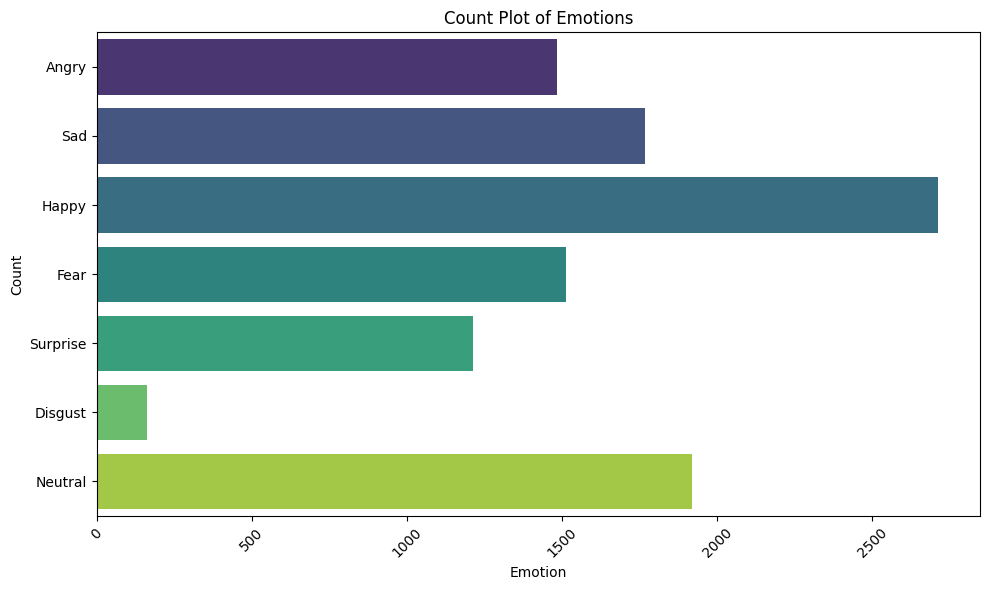

In [42]:
import seaborn as sns

emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

test_y_labels = [emotion_labels[label] for label in test_y]

plt.figure(figsize=(10, 6))
sns.countplot(test_y_labels, palette='viridis')
plt.title('Count Plot of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Because the data is imbalanced across classes, our team will use F1 score with weighted option to evaluate the models.

In [46]:
## visualize the confusion matrices and classification reports here
isPCA = 0
for i, result in enumerate([result_score, result_score_pca]):
  for i in range(len(result)):
      if i == 1:
          print()
          print(f"========== {result['Model'][i]} with PCA ==========")
          print(result['classification report'][i])
          print(result['confusion matrix'][i])
      print()
      print(f"========== {result['Model'][i]}==========")
      print(result['classification report'][i])
      print(result['confusion matrix'][i])



========== model_svm==========
              precision    recall  f1-score   support

           0       0.40      0.28      0.33      1482
           1       0.73      0.07      0.12       161
           2       0.39      0.29      0.33      1513
           3       0.51      0.71      0.59      2711
           4       0.38      0.42      0.40      1767
           5       0.60      0.53      0.56      1212
           6       0.45      0.40      0.42      1920

    accuracy                           0.46     10766
   macro avg       0.49      0.39      0.40     10766
weighted avg       0.46      0.46      0.45     10766

[[ 421    1  136  401  285   61  177]
 [  17   11   17   40   37    9   30]
 [ 132    0  437  333  247  155  209]
 [ 141    1  132 1926  244   75  192]
 [ 161    1  145  421  739   55  245]
 [  56    0  112  191   94  648  111]
 [ 133    1  131  488  311   82  774]]

========== lr_model with PCA ==========
              precision    recall  f1-score   support

        

In [44]:
max_f1_pca = result_score_pca.loc[result_score_pca['F1 Score'].idxmax()]
max_f1 = result_score.loc[result_score['F1 Score'].idxmax()]

if max_f1_pca['F1 Score'] > max_f1['F1 Score']:
    print("Mẫu dữ liệu có giá trị F1 Score với chiến lực 'weighted' cao nhất nằm trong result_score_pca:")
    print(max_f1_pca)
else:
    print("Mẫu dữ liệu có giá trị F1 Score với chiến lực 'weighted' cao nhất nằm trong result_score:")
    print(max_f1)

Mẫu dữ liệu có giá trị F1 Score với chiến lực 'weighted' cao nhất nằm trong result_score:
Model                                                             dt_model
Accuracy                                                          0.737321
F1 Score                                                          0.738689
Best params              {'criterion': 'gini', 'max_depth': None, 'max_...
classification report                  precision    recall  f1-score   ...
confusion matrix         [[1145, 9, 60, 96, 73, 35, 64], [16, 114, 10, ...
Name: 2, dtype: object


Based on the prediction results using the F1-score evaluation strategy with average = "weighted" (for imbalanced data), we found that the Decision model trained on original data yielded the best results. This can be explained as follows:

1. I think we might not found the optimal value range to use GridSearchCV for all methods (as the results are relatively low), but Decision Tree did it, so Decision Tree with original data was quite lucky to find the optimal parameter set (compared to other models), thus yielding the best results (Accuracy - 0.737321 and weighted F1-Score 0.738689).
2. We trained on 25121 images and tested on 10766 images, which significantly affected the overall performance of the models. Consequently, simpler models tend to underfit on the test data, leading to achieve low score, and Decision Tree may not being underfitted, so it have a highest score.
3. The decision tree is a non-parametric model, meaning it does not concern itself with whether the data is linear or nonlinear. Additionally, it can perform very well on large datasets, which might be the reason why the Decision Tree model achieves the best performance.

In [47]:
with open(dt_model_path, 'rb') as f:
         dt_model = pickle.load(f)

y_pred = dt_model.predict(test_x)
len(y_pred), len(test_y)

(10766, 10766)

In [48]:
pred_y_labels = [emotion_labels[label] for label in y_pred]

In [49]:
# Count samples pred_y_labels and test_y_labels
values_pred, counts_pred = np.unique(pred_y_labels, return_counts=True)
values_test, counts_test = np.unique(test_y_labels, return_counts=True)

# Sure that values_pred always have 7 class as the same values_test
# (Because sometime model won't surely predict a set that always have enough class same with grouth truth)
counts_pred_aligned = []
for label in values_test:
    if label in values_pred:
        counts_pred_aligned.append(counts_pred[np.where(values_pred == label)[0][0]])
    else:
        counts_pred_aligned.append(0)

counts_pred_aligned = np.array(counts_pred_aligned)

print(values_pred, "  ", counts_pred)
print(values_test, "  ", counts_test)
print("Aligned counts_pred: ", counts_pred_aligned)

['Angry' 'Disgust' 'Fear' 'Happy' 'Neutral' 'Sad' 'Surprise']    [1750  242 1663 2656 1659 1710 1086]
['Angry' 'Disgust' 'Fear' 'Happy' 'Neutral' 'Sad' 'Surprise']    [1482  161 1513 2711 1920 1767 1212]
Aligned counts_pred:  [1750  242 1663 2656 1659 1710 1086]


To identify the emotion category where the model makes the most accurate and most errors. We can base on 2 ways:
1. Plot the bar plot to see the most and the best predictions with grouth truth.
2. Base on Confusion matrix to detect the most accurate and the most errors



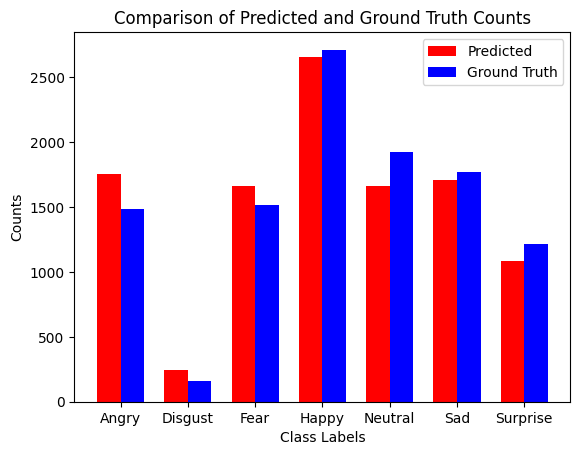

In [50]:
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(values_test))

bar1 = ax.bar(index, counts_pred_aligned, bar_width, color='red', label='Predicted')
bar2 = ax.bar(index + bar_width, counts_test, bar_width, color='blue', label='Ground Truth')

ax.set_xlabel('Class Labels')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Predicted and Ground Truth Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(values_test)
ax.legend()

plt.show()

In [51]:
print(max_f1["classification report"])

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1482
           1       0.47      0.71      0.57       161
           2       0.68      0.74      0.71      1513
           3       0.80      0.78      0.79      2711
           4       0.73      0.71      0.72      1767
           5       0.81      0.72      0.76      1212
           6       0.79      0.68      0.73      1920

    accuracy                           0.74     10766
   macro avg       0.70      0.73      0.71     10766
weighted avg       0.74      0.74      0.74     10766



Emotion with most accurate predictions: Happy
Emotion with most errors: Happy


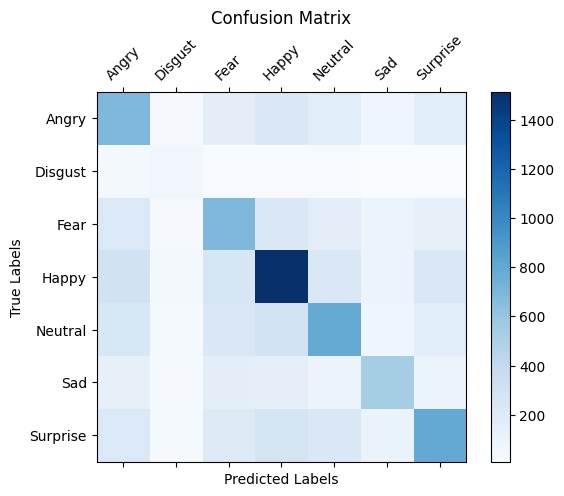

In [52]:
emotion_labels = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

cm = max_f1_pca["confusion matrix"]

accurate_counts = cm.diagonal()
total_counts = cm.sum(axis=1)
error_counts = total_counts - accurate_counts

most_accurate_index = np.argmax(accurate_counts)
most_errors_index = np.argmax(error_counts)

print(f"Emotion with most accurate predictions: {emotion_labels[most_accurate_index]}")
print(f"Emotion with most errors: {emotion_labels[most_errors_index]}")

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_xticks(np.arange(len(emotion_labels)))
ax.set_yticks(np.arange(len(emotion_labels)))
ax.set_xticklabels(emotion_labels, rotation=45)
ax.set_yticklabels(emotion_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()